In [1]:
import pandas as pd
import numpy as np

In [2]:
ls

Logistic Regression.ipynb              only_motor_2.csv
Logistic Regression_two_classes.ipynb  only_motor_two_classes.csv
combined_with_two_classes.csv          only_non_motor_2.csv
making_datasets_for_two_class.ipynb    only_non_motor_two_classes.csv
new_merge_2.csv                        only_self_report_2.csv
new_merge_2.cvs                        only_self_report_two_classes.csv


In [88]:
raw_df = pd.read_csv('only_self_report_two_classes.csv')

In [89]:
raw_df['CLASS'].value_counts()

CLASS
1    7219
0    2795
Name: count, dtype: int64

In [90]:
from sklearn.linear_model import LogisticRegression

In [91]:
model = LogisticRegression(solver='liblinear')

In [92]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [93]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, RobustScaler, MaxAbsScaler

In [94]:
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score

In [95]:
cv = StratifiedKFold(n_splits = 5)

In [96]:
scaler = MinMaxScaler()

In [97]:
X = raw_df.iloc[:, 2:]

In [98]:
Y = raw_df.iloc[:, 1]

In [99]:
X.shape

(10014, 92)

In [100]:
Y

0        1
1        1
2        1
3        1
4        1
        ..
10009    0
10010    1
10011    0
10012    1
10013    1
Name: CLASS, Length: 10014, dtype: int64

In [101]:
fold_accuracies = []
fold_recalls = []
fold_precisions = []
fold_classification_reports = []
fold_weights = []

In [102]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    # print(type(X_train))
    # print('X_train:')
    # print(X_train)
    # print()
    # print('X_test:')
    # print(X_test)
    # print()

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.fit_transform(X_test)

    X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

    # print(type(X_train))
    # print('X_trained_scaled:')
    # print(X_train_scaled)
    # print()
    # print('X_test_scaled:')
    # print(X_test_scaled)
    # print()

    model.fit(X_train_scaled, Y_train)
    Y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred, average='macro')
    precision = precision_score(Y_test, Y_pred, average='macro')
    report = classification_report(Y_test, Y_pred, output_dict=True)

    fold_accuracies.append(accuracy)
    fold_recalls.append(recall)
    fold_precisions.append(precision)
    fold_classification_reports.append(report)

    fold_weight = model.coef_[0]
    fold_weights.append(fold_weight)
    # fold_classification_reports.append(classification_report(Y_test, Y_pred, output_dict=True))

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

fold: 1
Accuracy for fold 1: 0.8987
Recall for fold 1: 0.8606
Precision for fold 1: 0.8823
-----
fold: 2
Accuracy for fold 2: 0.9301
Recall for fold 2: 0.9055
Precision for fold 2: 0.9187
-----
fold: 3
Accuracy for fold 3: 0.8927
Recall for fold 3: 0.8647
Precision for fold 3: 0.8675
-----
fold: 4
Accuracy for fold 4: 0.8412
Recall for fold 4: 0.8214
Precision for fold 4: 0.8007
-----
fold: 5
Accuracy for fold 5: 0.8252
Recall for fold 5: 0.8146
Precision for fold 5: 0.7833
-----


In [103]:
fold_accuracies = np.array(fold_accuracies)
fold_precisions = np.array(fold_precisions)
fold_recalls = np.array(fold_recalls)
fold_weights = np.array(fold_weights)

In [105]:
print("Non-weighted:")
print(f"{fold_accuracies.mean():.4f}")
print(f"{fold_precisions.mean():.4f}")
print(f"{fold_recalls.mean():.4f}")
weights = fold_weights.mean(axis=0).tolist()
# print(weights)

Non-weighted:
0.8776
0.8505
0.8534


In [106]:
"""
Non weighted:
0.9425
0.9288
0.9349

Weighted:
0.9330
0.9124
0.9377
"""

"""
WITHOUT SCALING:
acc: 0.8213
prec: 0.7320
recall: 0.6231

StandardScaler:
0.8235
0.7305
0.6193

Normalizer:
0.8235
0.7305
0.6193

MinMaxScaler:
0.8230
0.7472
0.6217

RobustScaler:
0.8199
0.7271
0.6054

MaxAbsScaler:
0.8232
0.7507
0.6214
"""

'\nWITHOUT SCALING:\nacc: 0.8213\nprec: 0.7320\nrecall: 0.6231\n\nStandardScaler:\n0.8235\n0.7305\n0.6193\n\nNormalizer:\n0.8235\n0.7305\n0.6193\n\nMinMaxScaler:\n0.8230\n0.7472\n0.6217\n\nRobustScaler:\n0.8199\n0.7271\n0.6054\n\nMaxAbsScaler:\n0.8232\n0.7507\n0.6214\n'

In [107]:
weight_df = pd.DataFrame({
    'features': X.columns.tolist(),
    'weights': weights
})

# input_cols = X_train.columns.tolist()
# weight_df = pd.DataFrame({
#     'feature': input_cols,
#     'weight': model.coef_.tolist()[0]
# })

In [108]:
weight_df

features   weights
0     NP1COG -0.741005
1    NP1HALL  1.300855
2    NP1DPRS -0.348623
3    NP1ANXS -0.209622
4    NP1APAT  0.130089
..       ...       ...
87  STAIAD36  0.016156
88  STAIAD37 -0.377718
89  STAIAD38  0.049557
90  STAIAD39 -0.203401
91  STAIAD40 -0.375425

[92 rows x 2 columns]

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='weights', ylabel='features'>

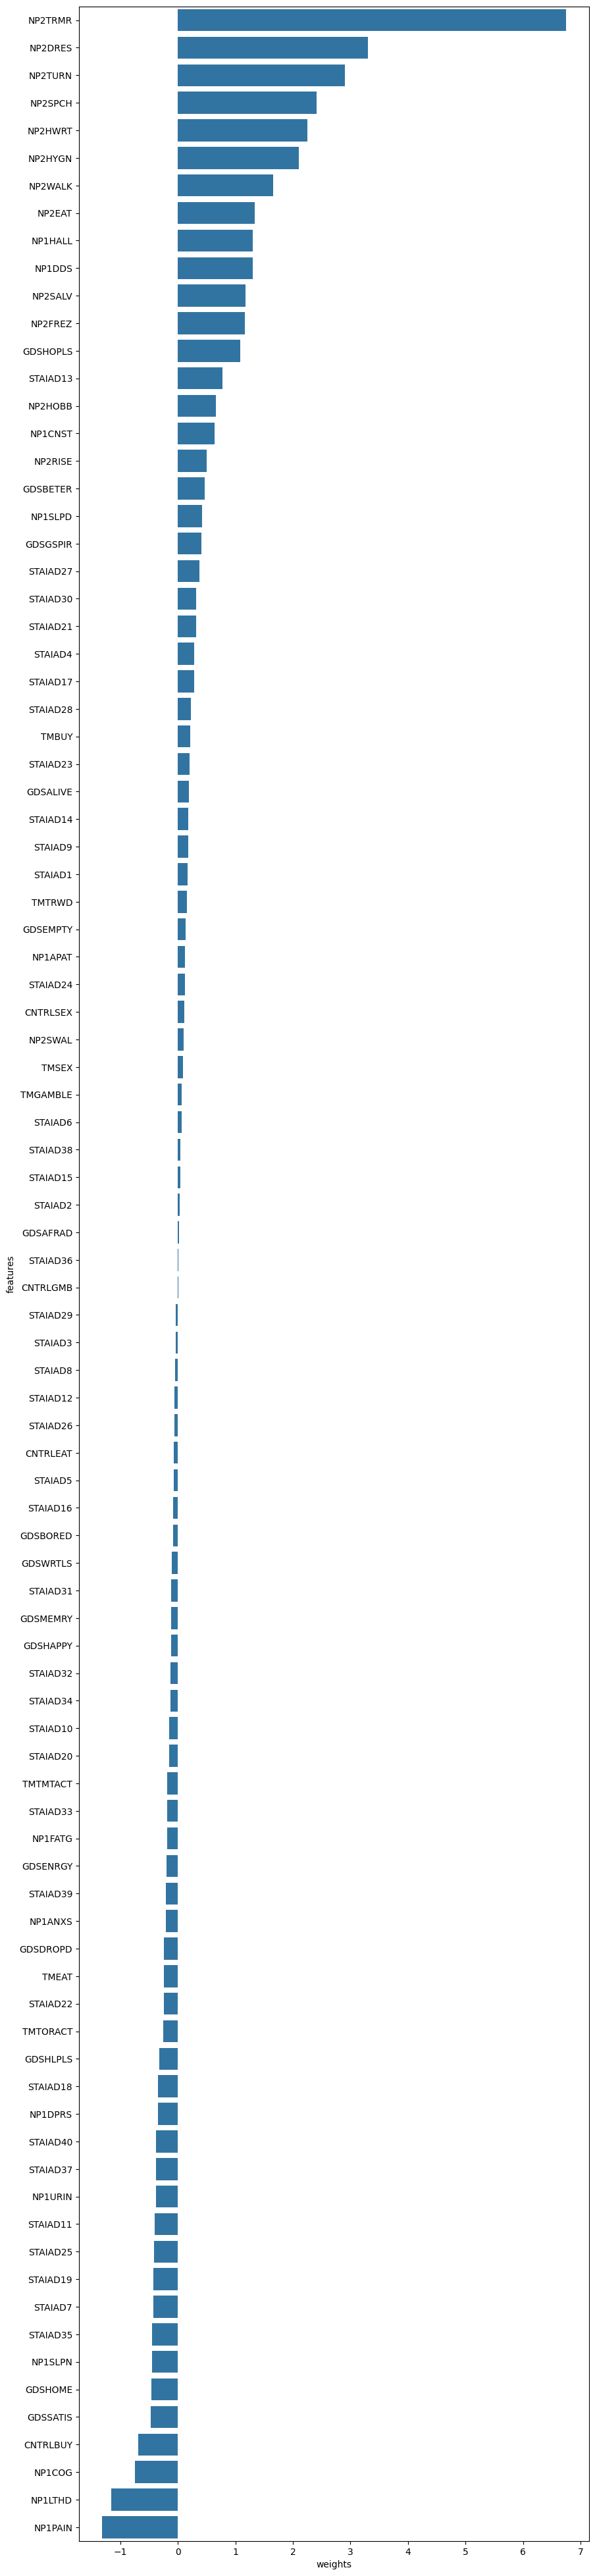

In [111]:
plt.figure(figsize=(10, 50))
sns.barplot(weight_df.sort_values('weights', ascending=False), x = 'weights', y = 'features')

In [114]:
top_20 = weight_df.sort_values('weights', ascending=False).head(20)

In [115]:
top_20

features   weights
22   NP2TRMR  6.740797
17   NP2DRES  3.307206
21   NP2TURN  2.897616
13   NP2SPCH  2.406438
19   NP2HWRT  2.256915
18   NP2HYGN  2.099527
24   NP2WALK  1.660952
16    NP2EAT  1.336156
1    NP1HALL  1.300855
5     NP1DDS  1.297303
14   NP2SALV  1.178255
25   NP2FREZ  1.161710
39  GDSHOPLS  1.090725
64  STAIAD13  0.782403
20   NP2HOBB  0.664453
10   NP1CNST  0.642117
23   NP2RISE  0.498512
40  GDSBETER  0.471004
7    NP1SLPD  0.419738
30  GDSGSPIR  0.414417

In [ ]:
['MCAVF',
 'LNS1B',
 'CNTRLGMB',
 'DRMVIVID',
 'MCACAMEL',
 'CNTRLEAT',
 'SCAU26C',
 'NP2FREZ',
 'NP3RTARL',
 'DBSYN',
 'FNCDTCOG',
 'NP3LGAGL',
 'MCAREC2',
 'SLPINJUR',
 'GDSBETER',
 'NP3KTRML',
 'NP2HYGN',
 'GDSDROPD',
 'STAIAD10',
 'SCAU7',
 'NP1COG',
 'LNS3B',
 'MCACLCKN',
 'NP1PAIN',
 'NP3RISNG']

In [ ]:
# WEIGHTED!

In [31]:
model_2 = LogisticRegression(solver='liblinear', class_weight='balanced')

In [32]:
fold_accuracies_2 = []
fold_recalls_2 = []
fold_precisions_2 = []
fold_classification_reports_2 = []

In [33]:
for fold, (train_index, test_index) in enumerate(cv.split(X, Y)):
    print(f"fold: {fold + 1}")

    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

    model_2.fit(X_train, Y_train)
    Y_pred = model_2.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred, average='macro')
    precision = precision_score(Y_test, Y_pred, average='macro')
    report = classification_report(Y_test, Y_pred)

    fold_accuracies_2.append(accuracy)
    fold_recalls_2.append(recall)
    fold_precisions_2.append(precision)
    # fold_classification_reports.append(classification_report(Y_test, Y_pred, output_dict=True))

    print(f"Accuracy for fold {fold + 1}: {accuracy:.4f}")
    print(f"Recall for fold {fold + 1}: {recall:.4f}")
    print(f"Precision for fold {fold + 1}: {precision:.4f}")
    print("-----")

fold: 1
Accuracy for fold 1: 0.9036
Recall for fold 1: 0.8629
Precision for fold 1: 0.8148
-----
fold: 2
Accuracy for fold 2: 0.9411
Recall for fold 2: 0.8628
Precision for fold 2: 0.8772
-----
fold: 3
Accuracy for fold 3: 0.9286
Recall for fold 3: 0.8950
Precision for fold 3: 0.8458
-----
fold: 4
Accuracy for fold 4: 0.8407
Recall for fold 4: 0.8482
Precision for fold 4: 0.7375
-----
fold: 5
Accuracy for fold 5: 0.8606
Recall for fold 5: 0.8305
Precision for fold 5: 0.7933
-----


In [34]:
fold_accuracies_2 = np.array(fold_accuracies_2)
fold_precisions_2 = np.array(fold_precisions_2)
fold_recalls_2 = np.array(fold_recalls_2)

In [36]:
print("Weighted:")
print(fold_accuracies_2.mean())
print(fold_precisions_2.mean())
print(fold_recalls_2.mean())

Weighted:
0.894943648463369
0.8137304666576135
0.8598801205607325


In [19]:
train_df, test_df = train_test_split(raw_df, test_size=0.2, random_state = 0)

In [20]:
X_train = train_df.iloc[:, 2:]

In [21]:
Y_train = train_df.iloc[:, 1]

In [22]:
X_test = test_df.iloc[:, 2:]

In [23]:
Y_test = test_df.iloc[:, 1]

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
model = LogisticRegression(solver='liblinear')

In [26]:
cv = StratifiedKFold(n_splits=5)

In [29]:
cv_split = cv.split(X_train, Y_train)

In [30]:
for one, two in cv_split:
    print(len(one))
    print(len(two))

6408
1603
6409
1602
6409
1602
6409
1602
6409
1602


In [15]:
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [14]:
model.predict(X_train)

array([1., 1., 0., ..., 1., 0., 1.])

In [15]:
Y_train_pred = model.predict(X_train)

In [33]:
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score

In [34]:
accuracy_score(Y_train_pred, Y_train)

0.9560564987872735

In [35]:
Y_pred = model.predict(X_test)

In [36]:
accuracy_score(Y_pred, Y_test)

0.935440931780366

In [37]:
precision_score(Y_pred, Y_test, average='macro')

0.8557404860938008

In [38]:
recall_score(Y_pred, Y_test, average='macro')

0.8923871978492807

In [21]:
report = classification_report(Y_pred, Y_test)

In [22]:
print(report)

              precision    recall  f1-score   support

         0.0       0.95      0.92      0.94       867
         1.0       0.95      0.95      0.95      1986
         2.0       0.66      0.80      0.72       152

    accuracy                           0.94      3005
   macro avg       0.86      0.89      0.87      3005
weighted avg       0.94      0.94      0.94      3005



In [23]:
input_cols = X_train.columns.tolist()
weight_df = pd.DataFrame({
    'feature': input_cols,
    'weight': model.coef_.tolist()[0]
})

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='weight', ylabel='feature'>

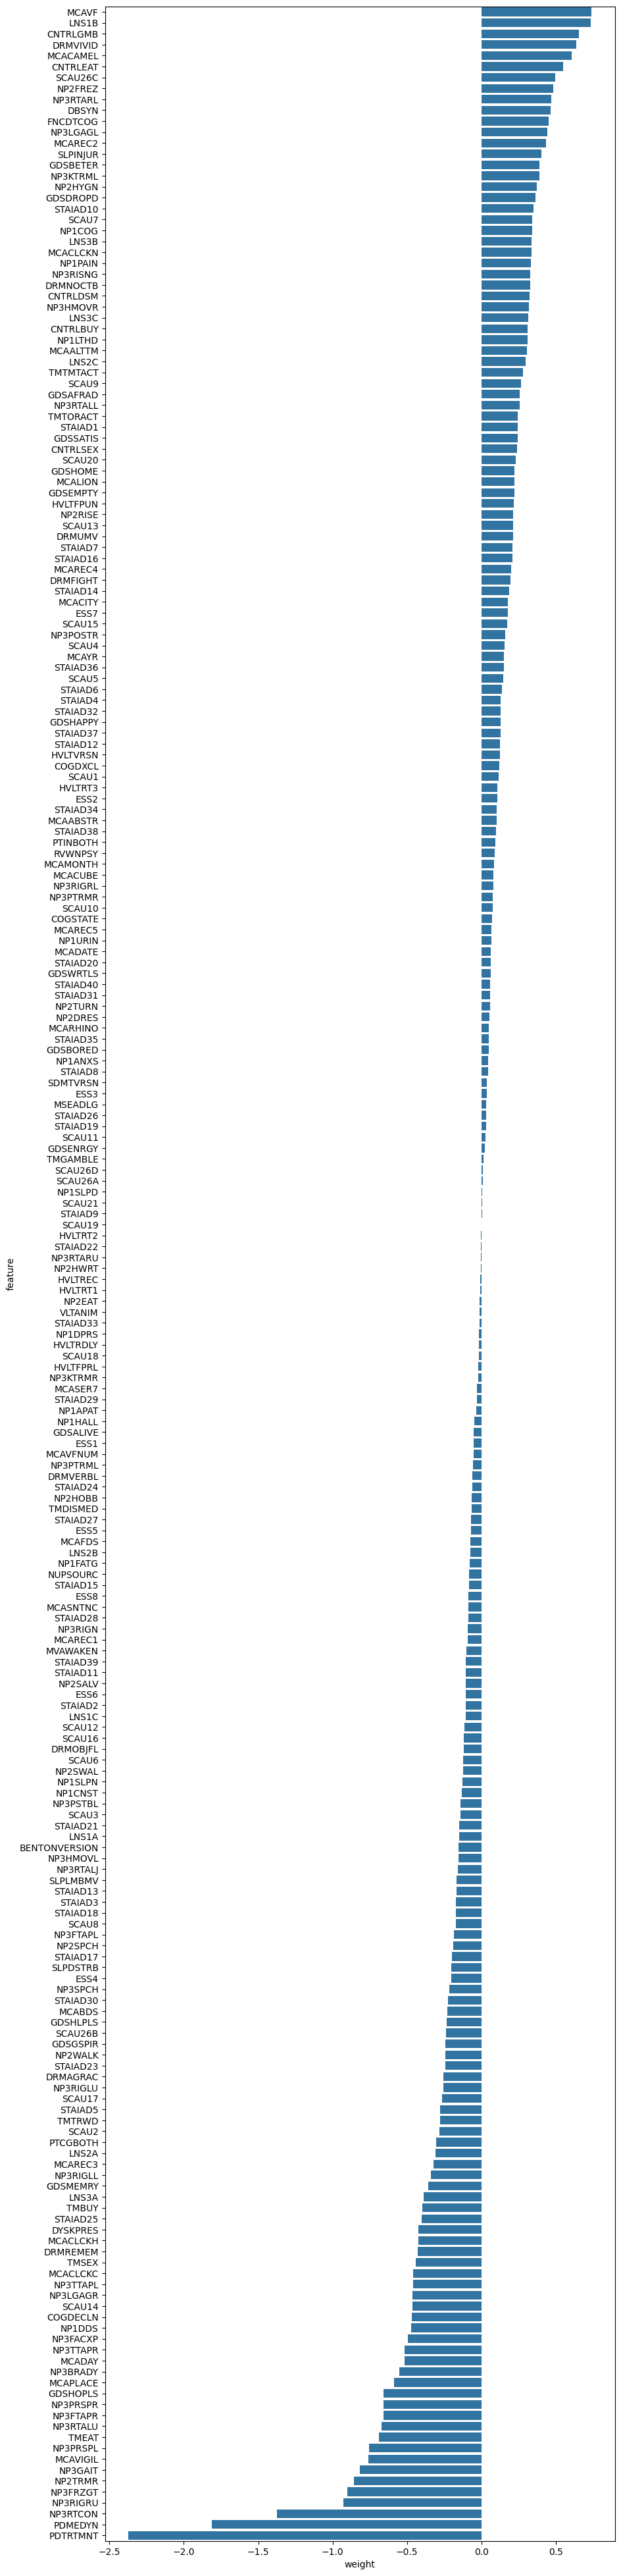

In [25]:
plt.figure(figsize=(10,50))
sns.barplot(data=weight_df.sort_values('weight', ascending=False), x='weight', y='feature')

In [28]:
top_25 = weight_df.sort_values('weight', ascending=False)['feature'].head(25).tolist()

In [31]:
top_25

['MCAVF',
 'LNS1B',
 'CNTRLGMB',
 'DRMVIVID',
 'MCACAMEL',
 'CNTRLEAT',
 'SCAU26C',
 'NP2FREZ',
 'NP3RTARL',
 'DBSYN',
 'FNCDTCOG',
 'NP3LGAGL',
 'MCAREC2',
 'SLPINJUR',
 'GDSBETER',
 'NP3KTRML',
 'NP2HYGN',
 'GDSDROPD',
 'STAIAD10',
 'SCAU7',
 'NP1COG',
 'LNS3B',
 'MCACLCKN',
 'NP1PAIN',
 'NP3RISNG']